# Computer Vision color spaces

### Import statements

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### To edit an image making a copy of it is always a good idea!

In [3]:
# helper function

def imgshow(img):
    plt.figure(figsize=(10,10))
    plt.imshow((img[:,:,::-1]))

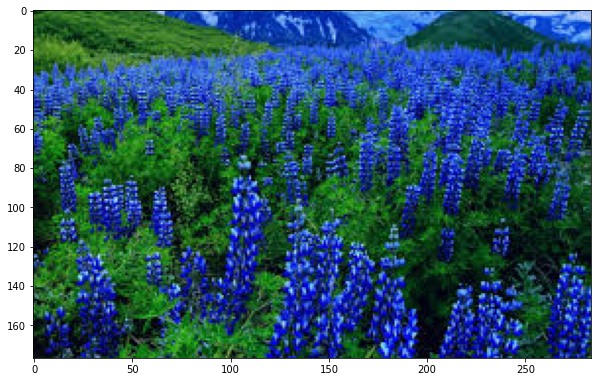

In [4]:
# Load an image
# And make a copy of the original image to avoid manipulating the original image

path = './img/'
blue_flowers = cv2.imread(path + 'blue-flowers.jpg')
blue_flowers_copy = blue_flowers.copy()
imgshow(blue_flowers)

[Hint](# "Numpy .copy function") 

## Color Spaces

### BGR Spliting the color channels

In [5]:
# Load a color image and split in is different B, G and R channels
b, g, r = cv2.split(blue_flowers_copy)

[Hint](# "cv2.split") 

In [6]:
# Show each channel channel on screen
b

array([[ 33,  43,  41, ..., 250, 245, 242],
       [  1,   0,   3, ..., 248, 246, 243],
       [ 34,  30,  38, ..., 245, 241, 241],
       ...,
       [ 16,  22,  24, ..., 125,  51,  49],
       [ 32,  18,   6, ...,  30,   0,  45],
       [ 19,  20,  22, ...,  76,  54,  45]], dtype=uint8)

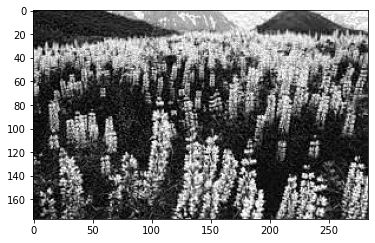

In [7]:
plt.imshow(b, cmap='gray')

In [8]:
g

array([[ 48,  63,  70, ..., 184, 185, 187],
       [ 40,  43,  52, ..., 184, 186, 188],
       [102,  98, 109, ..., 188, 188, 188],
       ...,
       [ 12,  12,  12, ...,  37,  31,  54],
       [ 20,  14,  10, ...,  26,  10,  47],
       [ 17,  18,  20, ...,  24,  81, 120]], dtype=uint8)

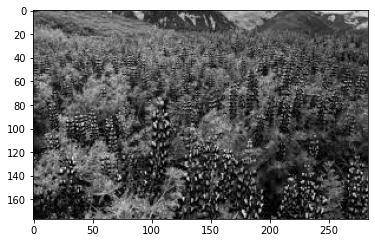

In [9]:
plt.imshow(g, cmap='gray')

In [10]:
r

array([[ 10,  21,  24, ..., 149, 149, 150],
       [  0,   0,   2, ..., 154, 156, 157],
       [ 49,  45,  53, ..., 162, 161, 161],
       ...,
       [ 11,  12,  10, ...,  13,   0,  23],
       [ 20,  13,   5, ...,   0,   0,  28],
       [  7,   8,  10, ...,   0,  38,  69]], dtype=uint8)

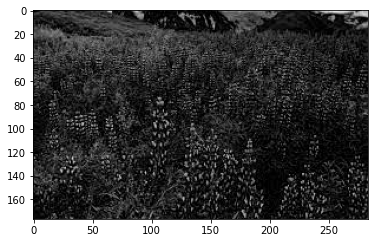

In [11]:
plt.imshow(r, cmap='gray')

#### Merging the color channels

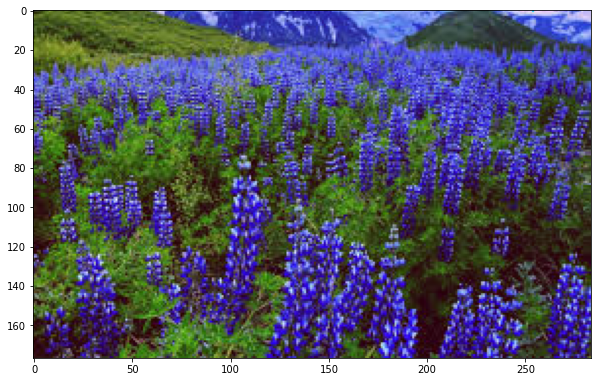

In [12]:
# Modify a channel and then merge them all again
r = r + 40
merged = cv2.merge([b, g, r])
imgshow(merged)

[Hint](# "cv2.merge") 

In [13]:
# Create a black canvas with the same size as the image you loaded
blue_red_flowers = cv2.imread(path + 'blue-red-flowers.png')
br_flowers_rgb = cv2.cvtColor(blue_red_flowers, cv2.COLOR_BGR2RGB)

black = np.zeros(br_flowers_rgb.shape[:2], dtype='uint8')
black


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

[Hint](# "use numpy np.zeros function with the img.shape[:2]") 

In [14]:
# Merge each channel with the black canvas 
# So you will end up with 3 images: (Red,Black,Black), (Black,Green,Black) and (Black,Black,Blue) 
# Assuming you are working with RGB, but BGR is also fine
r, g, b = cv2.split(br_flowers_rgb)
print(r.shape)
print(black.shape)

(919, 1386)
(919, 1386)


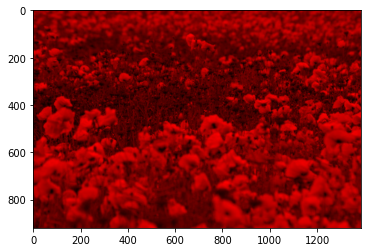

In [15]:
red_black_black = cv2.merge([r, black, black])
plt.imshow(red_black_black)

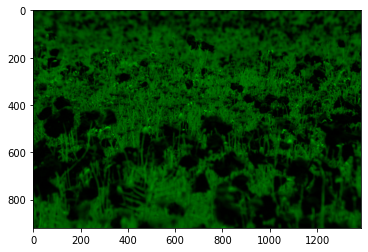

In [16]:
black_green_black = cv2.merge([black, g, black])
plt.imshow(black_green_black)

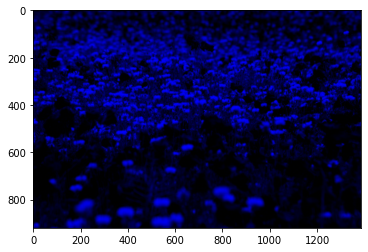

In [17]:
black_black_blue = cv2.merge([black, black, b])
plt.imshow(black_black_blue)

[Hint](# "cv2.merge") 

### HSV: Hue Saturation Value

#### M&Ms challenge!

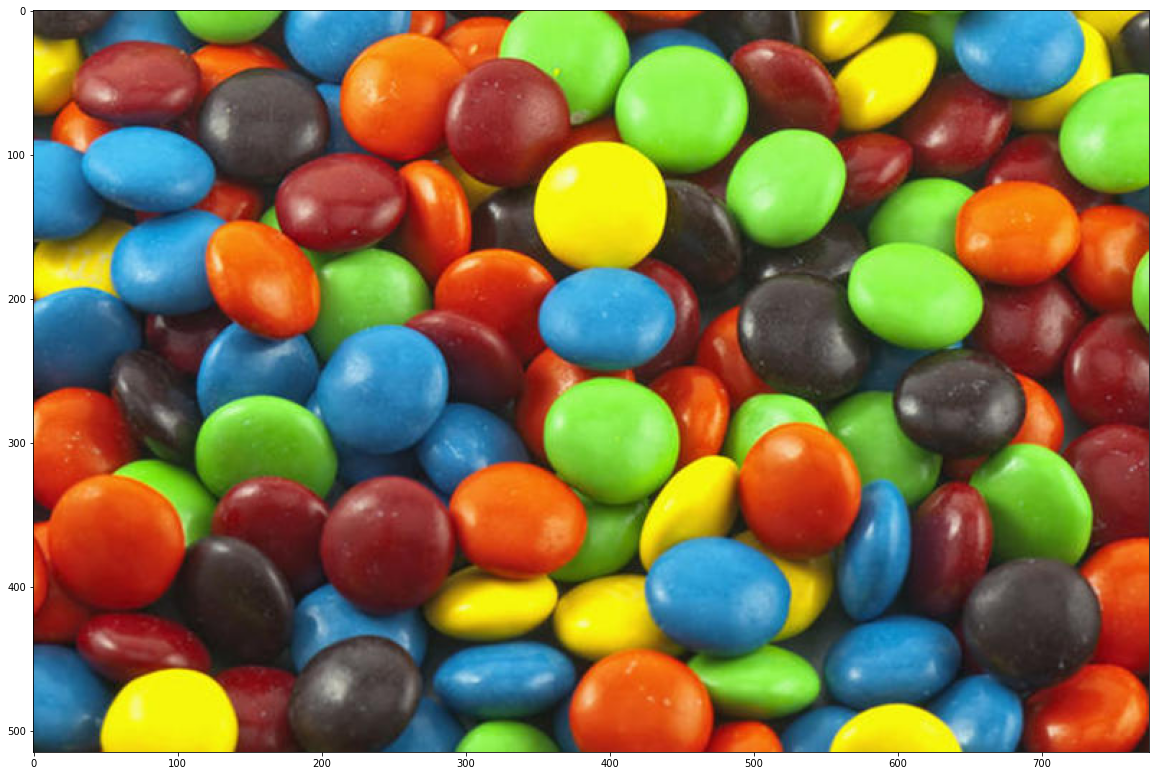

In [18]:
# Use the image below and convert it from BGR to HSV
img = cv2.imread('img/m.jpg')
plt.figure(figsize = (20,15));
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB));

In [19]:
# Split the H,S and V channels 

hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv_img)

[Hint](# "cv2.cvtColor") 

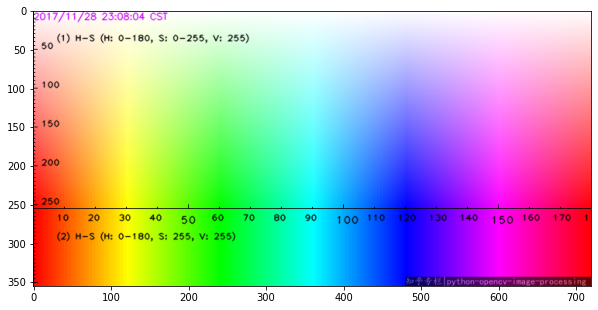

In [20]:
# Create a mask to filter out the Blue M&Ms (remember you need a lower and upper range)
# Make a copy of the hsv image and apply the mask to it, then display the image

hsv_map = cv2.imread(path + 'hsv.png')
imgshow(hsv_map)

In [21]:
hsv_copy = hsv_img.copy()
hsv_copy2 = hsv_img.copy()
hsv_copy3 = hsv_img.copy()

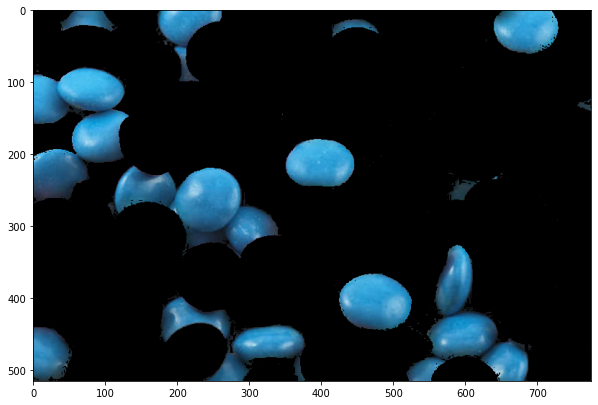

In [22]:
b_l_range = (95, 50, 20)
b_u_range = (145, 255, 255)
blue_mask = cv2.inRange(hsv_copy, b_l_range, b_u_range)
masked_img = img.copy()
masked_img[blue_mask == 0] = [0, 0, 0]
imgshow(masked_img)

[Hint](# "cv2.inRange") 

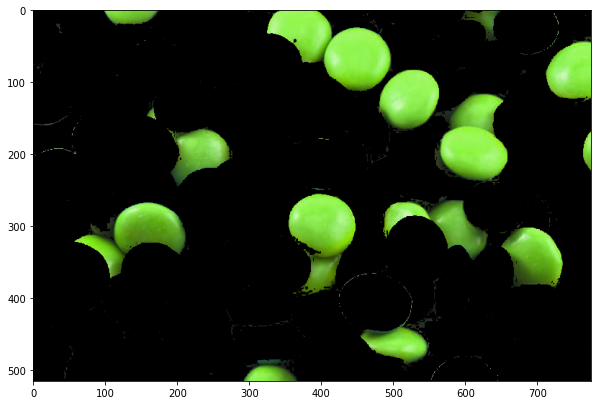

In [23]:
# Repeat the same but now with the greens
g_l_range = (40, 50, 20)
g_u_range = (80, 255, 255)
green_mask = cv2.inRange(hsv_copy2, g_l_range, g_u_range)
masked_img1 = img.copy()
masked_img1[green_mask == 0] = [0, 0, 0]
imgshow(masked_img1)

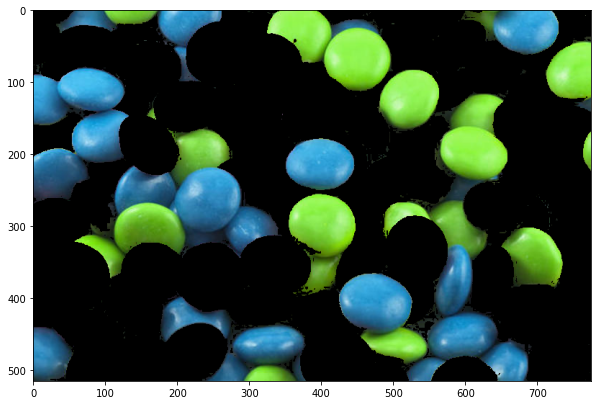

In [24]:
# Now combine both masks togheter so we can see all greens and blues in the same image!
l_range = (40, 50, 20)
u_range = (145, 255, 255)
mask = cv2.inRange(hsv_copy3, l_range, u_range)
mask_img = img.copy()
mask_img[mask == 0] = [0, 0, 0]
imgshow(mask_img)

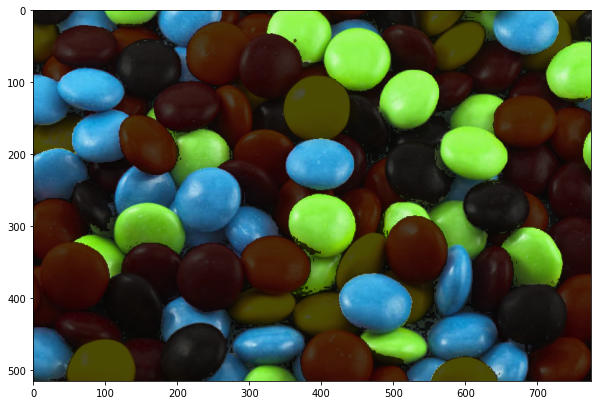

In [25]:
# Now lets combine both masks but also some opacity, we want to be able to see all M&Ms but
# Blues and greens will show as int he image above while the other colors will be faded out with some opacity
# You just need to add alpha to apply opacity to the dark parts of the mask, then display the image

opacity = 0.3
mm = cv2.addWeighted(img, opacity, mask_img, 1- opacity, 0)
imgshow(mm)

[Hint](# "cv2.addWeighted") 

In [26]:
# Below you will find an example with oranges and greens just for reference so you can see what we want to accomplish
# In this example the oranges are not perfect, and it can be improved a lot easily.

## Mini project

### Level 1

#### Ball tracker

1. Given an image with a ball on it isolate the ball

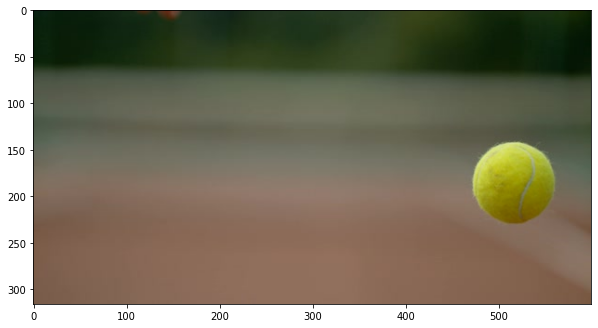

In [28]:
ball = cv2.imread(path + 'ball.jpg')
imgshow(ball)
ball_hsv = cv2.cvtColor(ball, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(ball_hsv)

In [ ]:
plt.imshow(s)

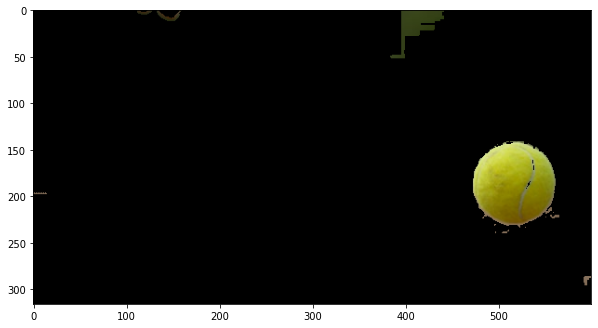

In [29]:
low_range = (15, 80, 0)
upper_range = (40, 255, 255)
ballmask = cv2.inRange(ball_hsv, low_range, upper_range)
masked_ball = ball.copy()
masked_ball[ballmask == 0] = [0, 0, 0]
imgshow(masked_ball)

### Level 2

#### Ball tracker

1. Make it track a ball in real time (either with a video or a webcam)

In [22]:

video = cv2.VideoCapture(0)

while(video.isOpened()):
    check, frame = video.read()
    if frame is not None:
        img = frame
        hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        
        lower_range1 = (50, 100, 0)
        upper_range1 = (80, 350, 255)
        
        mask1 = cv2.inRange(hsv_img, lower_range1, upper_range1)
        
        img_copy = img.copy()

        img_copy[mask1 == 0] = [0,0,0]
        
        cv2.imshow('frame',img_copy)        
        if cv2.waitKey(30) & 0xFF == ord('q'):
            break
    else:
        break


video.release()
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### Level 3

#### Ball Tracker

1. Can you make it track two or more different color balls at the same time?

In [25]:

video = cv2.VideoCapture(0)

while(video.isOpened()):
    check, frame = video.read()
    if frame is not None:
        img = frame
        hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        
        lower_range1 = (50, 100, 0)
        upper_range1 = (80, 350, 255)
        
        mask1 = cv2.inRange(hsv_img, lower_range1, upper_range1)
        
        lower_range2 = (100, 150, 0)
        upper_range2 = (145, 350, 255)
        
        mask2 = cv2.inRange(hsv_img, lower_range2, upper_range2)
        
        mask = (mask1 | mask2)
        
        img_copy = img.copy()

        img_copy[mask == 0] = [0,0,0]
        
        cv2.imshow('frame',img_copy)        
        if cv2.waitKey(30) & 0xFF == ord('q'):
            break
    else:
        break


video.release()
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1